<a href="https://colab.research.google.com/github/farukemrekaraca/ztm-tensorflow-machinelearning-deeplearning/blob/main/02_neural_network_classification_with_tensorflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
from sklearn.datasets import make_circles

n_samples = 1000

X, y = make_circles(n_samples,
                    noise=0.03,
                    random_state=42)

In [ ]:
X[:10]

array([[ 0.75424625,  0.23148074],
       [-0.75615888,  0.15325888],
       [-0.81539193,  0.17328203],
       [-0.39373073,  0.69288277],
       [ 0.44220765, -0.89672343],
       [-0.47964637,  0.67643477],
       [-0.01364836,  0.80334872],
       [ 0.77151327,  0.14775959],
       [-0.16932234, -0.79345575],
       [-0.1214858 ,  1.02150905]])

In [ ]:
y[:10]

array([1, 1, 1, 1, 0, 1, 1, 1, 1, 0])

In [ ]:
circles = pd.DataFrame({"X0": X[:, 0], "X1": X[:, 1], "label": y})
circles

,X0,X1,label
0,0.754246,0.231481,1
1,-0.756159,0.153259,1
2,-0.815392,0.173282,1
3,-0.393731,0.692883,1
4,0.442208,-0.896723,0
...,...,...,...
995,0.244054,0.944125,0
996,-0.978655,-0.272373,0
997,-0.136900,-0.810012,1
998,0.670362,-0.767502,0


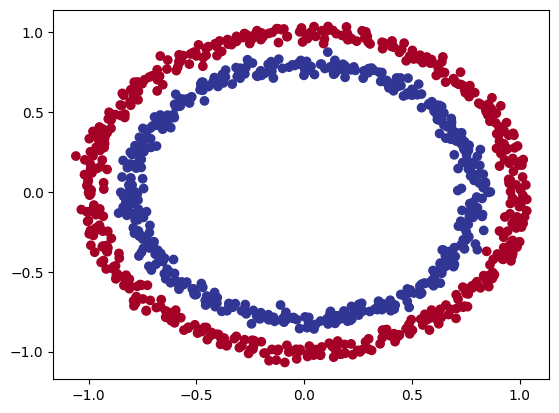

In [ ]:
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.RdYlBu);

In [ ]:
tf.random.set_seed(42)

model_1 = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

model_1.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.SGD(),
                metrics=["accuracy"])

model_1.fit(X, y, epochs=5)

Epoch 1/5
32/32 [==============================] - 2s 6ms/step - loss: 5.3307 - accuracy: 0.5390
Epoch 2/5
32/32 [==============================] - 0s 7ms/step - loss: 5.1337 - accuracy: 0.5420
Epoch 3/5
32/32 [==============================] - 0s 6ms/step - loss: 5.1601 - accuracy: 0.5370
Epoch 4/5
32/32 [==============================] - 0s 7ms/step - loss: 5.1413 - accuracy: 0.5360
Epoch 5/5
32/32 [==============================] - 0s 4ms/step - loss: 5.1103 - accuracy: 0.5400


In [ ]:
model_1.fit(X, y, epochs=200, verbose=0)

In [ ]:
model_1.evaluate(X, y)

32/32 [==============================] - 1s 8ms/step - loss: 7.7125 - accuracy: 0.5000


[7.712474346160889, 0.5]

In [ ]:
tf.random.set_seed(42)

model_2 = tf.keras.Sequential([
    tf.keras.layers.Dense(1),
    tf.keras.layers.Dense(1)
])

model_2.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.SGD(),
                metrics=["accuracy"])

model_2.fit(X, y, epochs=100)

Epoch 1/100
32/32 [==============================] - 2s 7ms/step - loss: 1.8453 - accuracy: 0.4710
Epoch 2/100
32/32 [==============================] - 0s 4ms/step - loss: 0.7155 - accuracy: 0.4850
Epoch 3/100
32/32 [==============================] - 0s 4ms/step - loss: 0.6986 - accuracy: 0.4810
Epoch 4/100
32/32 [==============================] - 0s 5ms/step - loss: 0.6948 - accuracy: 0.4770
Epoch 5/100
32/32 [==============================] - 0s 3ms/step - loss: 0.6942 - accuracy: 0.4920
Epoch 6/100
32/32 [==============================] - 0s 5ms/step - loss: 0.6935 - accuracy: 0.5060
Epoch 7/100
32/32 [==============================] - 0s 4ms/step - loss: 0.6941 - accuracy: 0.5000
Epoch 8/100
32/32 [==============================] - 0s 3ms/step - loss: 0.6939 - accuracy: 0.4870
Epoch 9/100
32/32 [==============================] - 0s 7ms/step - loss: 0.6940 - accuracy: 0.5020
Epoch 10/100
32/32 [==============================] - 0s 6ms/step - loss: 0.6937 - accuracy: 0.4950
Epoch 11/

In [ ]:
model_2.evaluate(X, y)

32/32 [==============================] - 0s 2ms/step - loss: 0.6932 - accuracy: 0.5000


[0.6932432055473328, 0.5]

In [ ]:
tf.random.set_seed(42)

model_3 = tf.keras.Sequential([
    tf.keras.Input(shape=(2)),
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

model_3.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

model_3.fit(X, y, epochs=100, verbose=0)

In [ ]:
model_3.evaluate(X, y)

32/32 [==============================] - 0s 2ms/step - loss: 0.7009 - accuracy: 0.5070


[0.7008562088012695, 0.5070000290870667]

In [ ]:
import numpy as np

In [ ]:
def plot_decision_boundary(model, X, y):
  x_min, x_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
  y_min, y_max = X[:, 1].min() - 0.1, X[:, 1].max() + 0.1

  xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                       np.linspace(y_min, y_max, 100))

  x_in = np.c_[xx.ravel(), yy.ravel()]

  y_pred = model.predict(x_in)

  if len(y_pred[0]) > 1:
    print("multiclass classification")
    y_pred = np.argmax(y_pred, axis=1).reshape(xx.shape)
  else:
    print("binary classification")
    y_pred = np.round(y_pred).reshape(xx.shape)

  plt.contourf(xx, yy, y_pred, cmap=plt.cm.RdYlBu, alpha=0.7)
  plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.RdYlBu)
  plt.xlim(xx.min(), xx.max())
  plt.ylim(yy.min(), yy.max())

313/313 [==============================] - 0s 1ms/step
binary classification


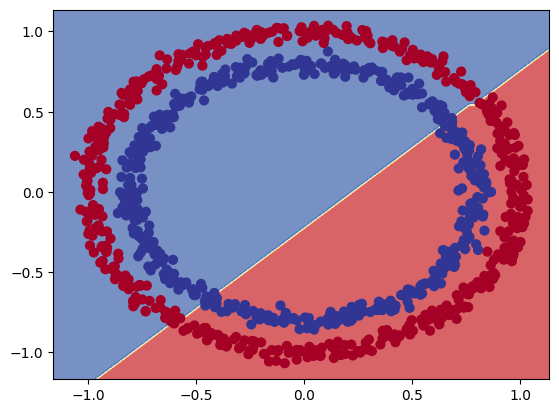

In [ ]:
plot_decision_boundary(model=model_3,
                       X=X,
                       y=y)

In [ ]:
# Set random seed
tf.random.set_seed(42)

# 1. Create the model (this time 3 layers)
model_4 = tf.keras.Sequential([
  ## Before TensorFlow 2.7.0
  # tf.keras.layers.Dense(100), # add 100 dense neurons

  ## After TensorFlow 2.7.0
  tf.keras.layers.Dense(100, input_shape=(None, 1)), # <- define input_shape here
  tf.keras.layers.Dense(10), # add another layer with 10 neurons
  tf.keras.layers.Dense(1)
])

# 2. Compile the model
model_4.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(), # use Adam instead of SGD
                metrics=['accuracy'])

In [ ]:
tf.random.set_seed(42)

model_5 = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

model_5.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.Adam(),
                metrics="mae")

In [ ]:
# Set random seed
tf.random.set_seed(42)

# Create some regression data
X_regression = tf.range(0, 1000, 5)
y_regression = tf.range(100, 1100, 5)

# Split it into training and test sets
X_reg_train = X_regression[:150]
X_reg_test = X_regression[150:]
y_reg_train = y_regression[:150]
y_reg_test = y_regression[150:]

# Fit our model to the data

## Note: Before TensorFlow 2.7.0, this line would work
# model_3.fit(X_reg_train, y_reg_train, epochs=100) # <- this will error in TensorFlow 2.7.0+

## After TensorFlow 2.7.0
model_5.fit(tf.expand_dims(X_reg_train, axis=-1), # <- expand input dimensions
            y_reg_train,
            epochs=100,
            verbose=0)

2/2 [==============================] - 0s 4ms/step


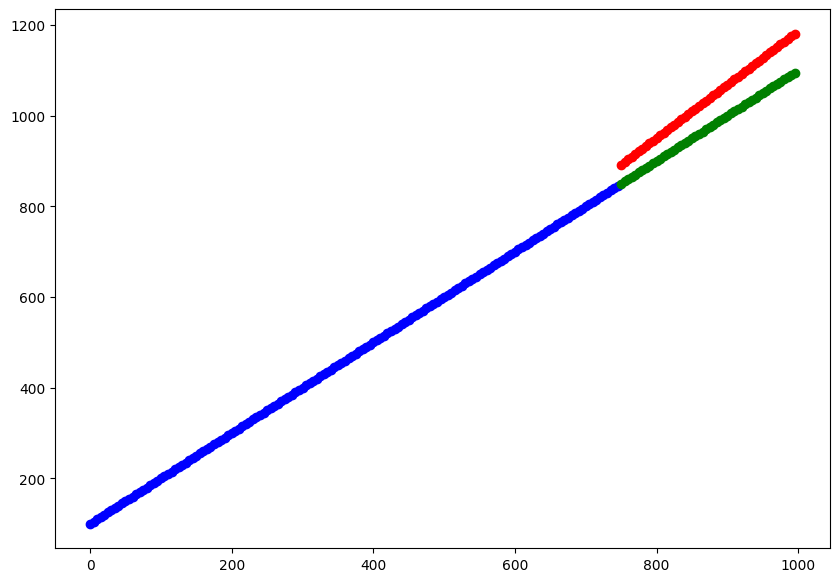

In [ ]:
y_reg_preds = model_5.predict(X_reg_test)

plt.figure(figsize=(10, 7))
plt.scatter(X_reg_train, y_reg_train, c="b", label="Training data")
plt.scatter(X_reg_test, y_reg_test, c="g", label="Test data")
plt.scatter(X_reg_test, y_reg_preds, c="r", label="Predictions")

In [ ]:
tf.random.set_seed(42)

model_6 = tf.keras.Sequential([
    tf.keras.layers.Dense(4, activation="tanh"),
    tf.keras.layers.Dense(2, activation="tanh")
])

model_6.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(0.03),
                metrics=["accuracy"])

model_6.fit(X, y, epochs=100, verbose=0)

313/313 [==============================] - 0s 1ms/step
multiclass classification


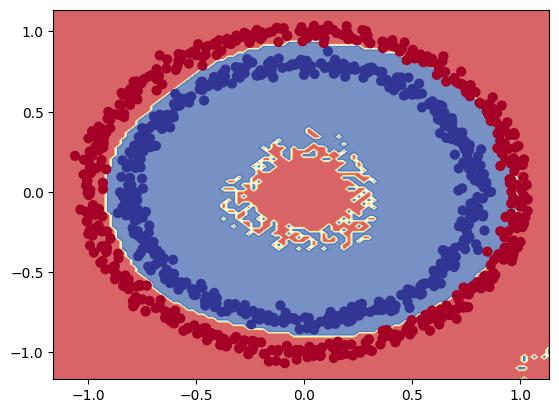

In [ ]:
plot_decision_boundary(model=model_6,
                       X=X,
                       y=y)

In [ ]:
tf.random.set_seed(42)

model_7 = tf.keras.Sequential([
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(1, activation="sigmoid"),
])

model_7.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(0.001),
                metrics=["accuracy"])

history = model_7.fit(X, y, epochs=100)

Epoch 1/100
32/32 [==============================] - 1s 2ms/step - loss: 0.6913 - accuracy: 0.5040
Epoch 2/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6911 - accuracy: 0.5120
Epoch 3/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6908 - accuracy: 0.5140
Epoch 4/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6905 - accuracy: 0.5140
Epoch 5/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6903 - accuracy: 0.5180
Epoch 6/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6900 - accuracy: 0.5190
Epoch 7/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6896 - accuracy: 0.5260
Epoch 8/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6893 - accuracy: 0.5120
Epoch 9/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6889 - accuracy: 0.5150
Epoch 10/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6885 - accuracy: 0.5130
Epoch 11/

313/313 [==============================] - 0s 1ms/step
binary classification


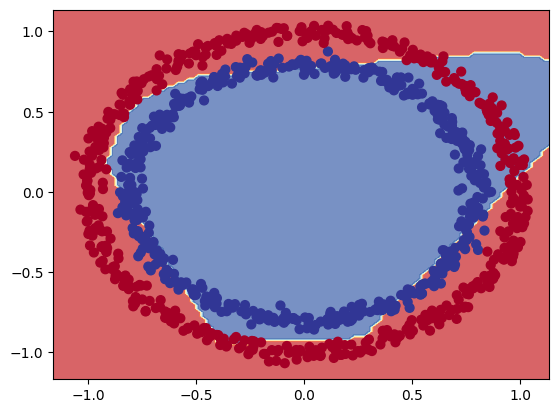

In [ ]:
plot_decision_boundary(model=model_7,
                       X=X,
                       y=y)

In [ ]:
A = tf.cast(tf.range(-10, 10), tf.float32)
A

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([-10.,  -9.,  -8.,  -7.,  -6.,  -5.,  -4.,  -3.,  -2.,  -1.,   0.,
         1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.],
      dtype=float32)>

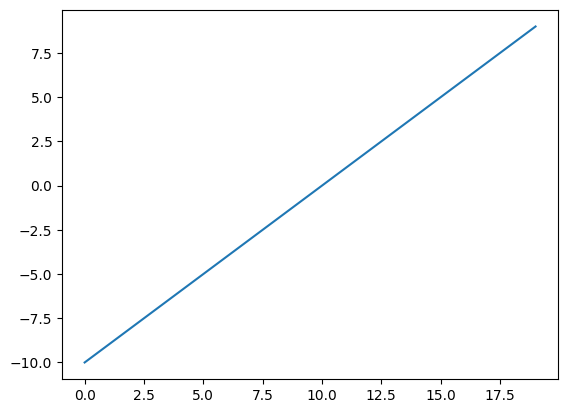

In [ ]:
plt.plot(A);

In [ ]:
def sigmoid(x):
  return 1 / (1 + tf.exp(-x))

In [ ]:
sigmoid(A)

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([4.5397872e-05, 1.2339458e-04, 3.3535014e-04, 9.1105117e-04,
       2.4726233e-03, 6.6928510e-03, 1.7986210e-02, 4.7425874e-02,
       1.1920292e-01, 2.6894143e-01, 5.0000000e-01, 7.3105860e-01,
       8.8079703e-01, 9.5257413e-01, 9.8201376e-01, 9.9330717e-01,
       9.9752742e-01, 9.9908900e-01, 9.9966466e-01, 9.9987662e-01],
      dtype=float32)>

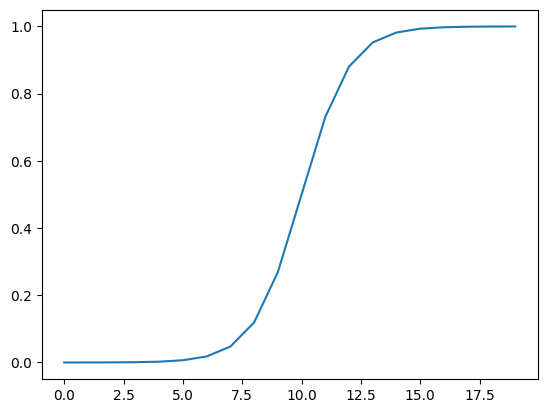

In [ ]:
plt.plot(sigmoid(A));

In [ ]:
def relu(x):
  return tf.maximum(0, x)

In [ ]:
relu(A)

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 2., 3., 4., 5., 6.,
       7., 8., 9.], dtype=float32)>

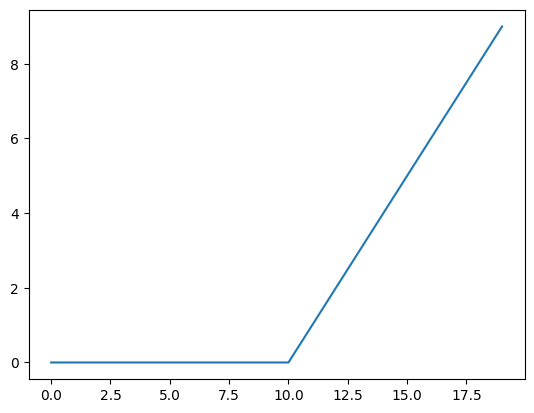

In [ ]:
plt.plot(relu(A))

In [ ]:
X_train, y_train = X[:800], y[:800]
X_test, y_test = X[800:], y[800:]

In [ ]:
tf.random.set_seed(42)

model_8 = tf.keras.Sequential([
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(1, activation="sigmoid")
])

model_8.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
                metrics=["accuracy"])

history_8 = model_8.fit(X_train, y_train, epochs=25)

Epoch 1/25
25/25 [==============================] - 1s 2ms/step - loss: 0.6919 - accuracy: 0.4938
Epoch 2/25
25/25 [==============================] - 0s 2ms/step - loss: 0.6876 - accuracy: 0.5375
Epoch 3/25
25/25 [==============================] - 0s 3ms/step - loss: 0.6822 - accuracy: 0.5325
Epoch 4/25
25/25 [==============================] - 0s 2ms/step - loss: 0.6757 - accuracy: 0.5700
Epoch 5/25
25/25 [==============================] - 0s 3ms/step - loss: 0.6675 - accuracy: 0.6012
Epoch 6/25
25/25 [==============================] - 0s 3ms/step - loss: 0.6582 - accuracy: 0.5913
Epoch 7/25
25/25 [==============================] - 0s 2ms/step - loss: 0.6462 - accuracy: 0.6538
Epoch 8/25
25/25 [==============================] - 0s 2ms/step - loss: 0.6304 - accuracy: 0.6500
Epoch 9/25
25/25 [==============================] - 0s 2ms/step - loss: 0.6063 - accuracy: 0.7362
Epoch 10/25
25/25 [==============================] - 0s 2ms/step - loss: 0.5725 - accuracy: 0.7675
Epoch 11/25
25/25 [

In [ ]:
model_8.evaluate(X_test, y_test)

7/7 [==============================] - 0s 3ms/step - loss: 0.2312 - accuracy: 0.9100


[0.23118428885936737, 0.9100000262260437]

313/313 [==============================] - 0s 1ms/step
binary classification


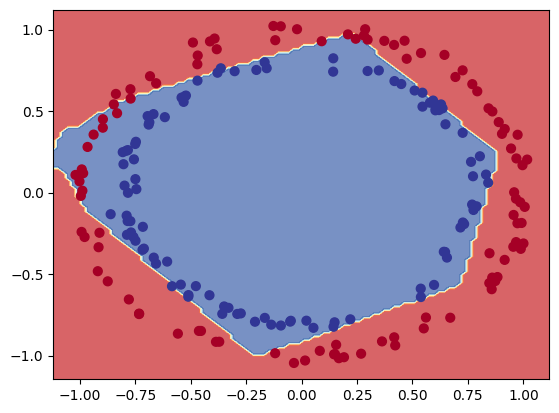

In [ ]:
plot_decision_boundary(model=model_8, X=X_test, y=y_test)

313/313 [==============================] - 0s 1ms/step
binary classification
313/313 [==============================] - 1s 2ms/step
binary classification


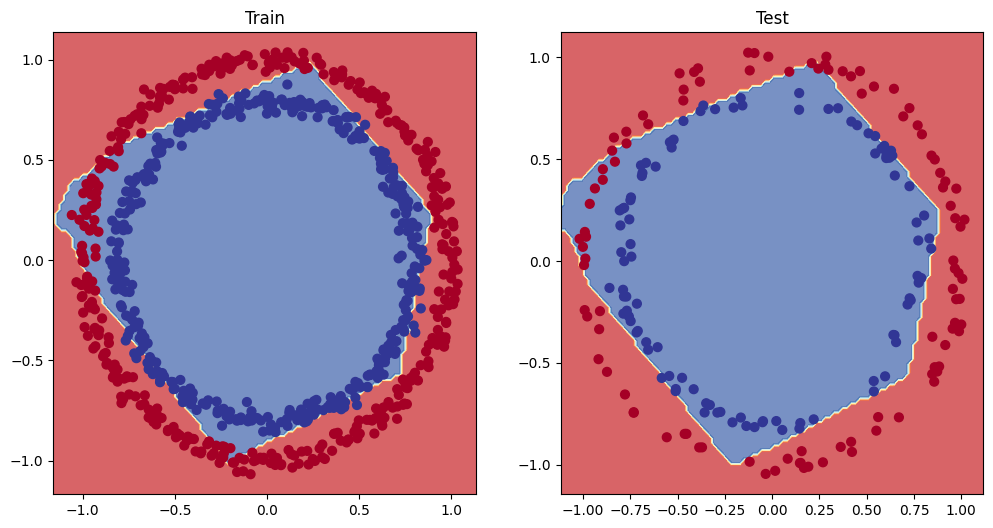

In [ ]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Train")
plot_decision_boundary(model_8, X=X_train, y=y_train)
plt.subplot(1, 2, 2)
plt.title("Test")
plot_decision_boundary(model_8, X=X_test, y=y_test)
plt.show();

In [ ]:
history_8.history

{'loss': [0.6919193863868713,
  0.6876124739646912,
  0.6821559071540833,
  0.675707221031189,
  0.6675429344177246,
  0.6582284569740295,
  0.6461920738220215,
  0.6303722262382507,
  0.6062938570976257,
  0.572540283203125,
  0.5379320383071899,
  0.497336208820343,
  0.4571153223514557,
  0.4219388961791992,
  0.3928395211696625,
  0.3660719692707062,
  0.34559932351112366,
  0.3247535824775696,
  0.31489408016204834,
  0.30197587609291077,
  0.2831953763961792,
  0.275759756565094,
  0.2604229748249054,
  0.2535642683506012,
  0.2627687156200409],
 'accuracy': [0.4937500059604645,
  0.5375000238418579,
  0.5325000286102295,
  0.5699999928474426,
  0.6012499928474426,
  0.5912500023841858,
  0.6537500023841858,
  0.6499999761581421,
  0.7362499833106995,
  0.7674999833106995,
  0.8037499785423279,
  0.8374999761581421,
  0.8299999833106995,
  0.8462499976158142,
  0.8537499904632568,
  0.875,
  0.8700000047683716,
  0.8799999952316284,
  0.8862500190734863,
  0.8737499713897705,
  0

In [ ]:
pd.DataFrame(history_8.history)

,loss,accuracy
0,0.691919,0.49375
1,0.687612,0.53750
2,0.682156,0.53250
3,0.675707,0.57000
4,0.667543,0.60125
5,0.658228,0.59125
6,0.646192,0.65375
7,0.630372,0.65000
8,0.606294,0.73625
9,0.572540,0.76750


Text(0.5, 1.0, 'Model_8 loss curves')

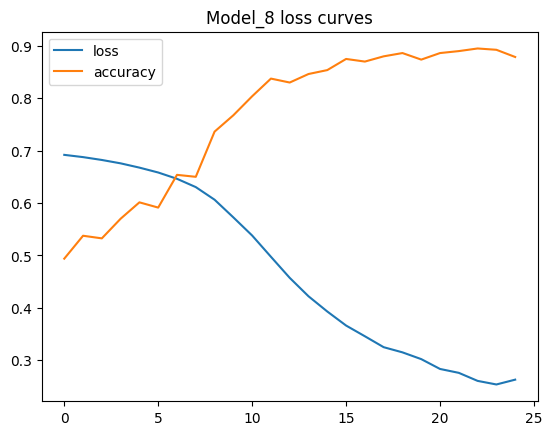

In [ ]:
pd.DataFrame(history_8.history).plot()
plt.title("Model_8 loss curves")

In [ ]:
tf.random.set_seed(42)

model_9 = tf.keras.Sequential([
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(1, activation="sigmoid")
])

model_9.compile(loss="binary_crossentropy",
                optimizer="Adam",
                metrics=["accuracy"])

lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-4 * 10**(epoch/20))

history_9 = model_9.fit(X_train, y_train, epochs=100, callbacks=[lr_scheduler])

Epoch 1/100
25/25 [==============================] - 1s 2ms/step - loss: 0.6936 - accuracy: 0.4925 - lr: 1.0000e-04
Epoch 2/100
25/25 [==============================] - 0s 3ms/step - loss: 0.6935 - accuracy: 0.4975 - lr: 1.1220e-04
Epoch 3/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6934 - accuracy: 0.4963 - lr: 1.2589e-04
Epoch 4/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6933 - accuracy: 0.4963 - lr: 1.4125e-04
Epoch 5/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6931 - accuracy: 0.4950 - lr: 1.5849e-04
Epoch 6/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6930 - accuracy: 0.4963 - lr: 1.7783e-04
Epoch 7/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6928 - accuracy: 0.4925 - lr: 1.9953e-04
Epoch 8/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6927 - accuracy: 0.4925 - lr: 2.2387e-04
Epoch 9/100
25/25 [==============================] - 0s 2ms/step - loss:

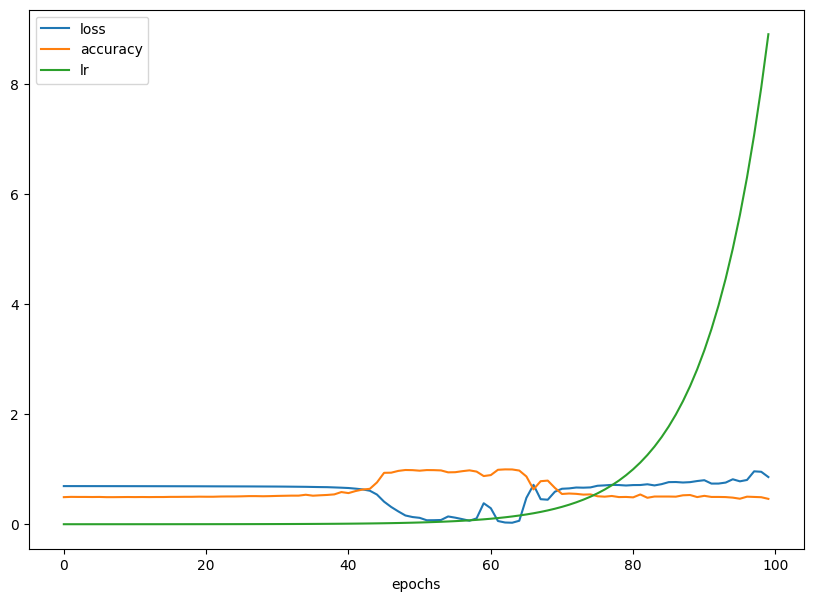

In [ ]:
pd.DataFrame(history_9.history).plot(figsize=(10, 7), xlabel="epochs");

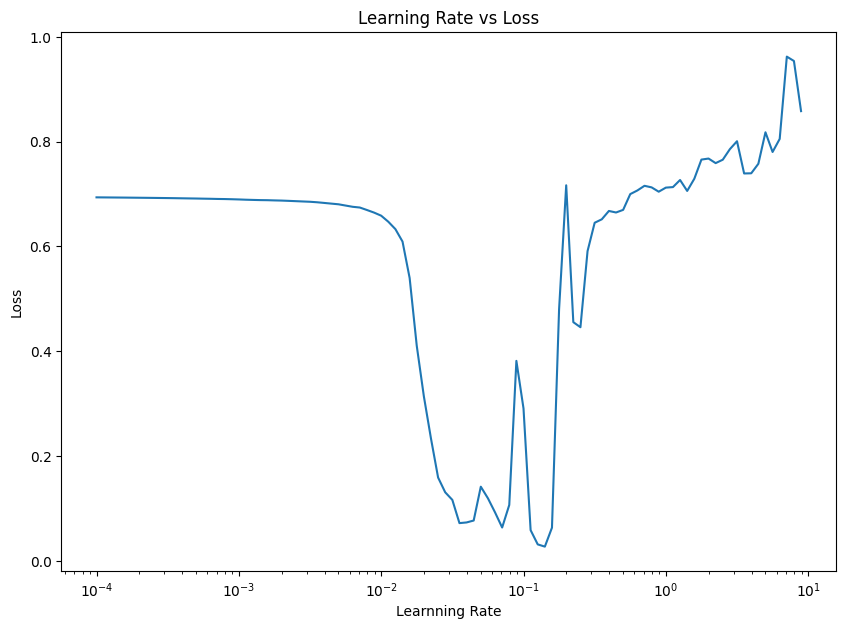

In [ ]:
lrs = 1e-4 * (10 ** (tf.range(100)/20))
plt.figure(figsize=(10, 7))
plt.semilogx(lrs, history_9.history["loss"])
plt.xlabel("Learnning Rate")
plt.ylabel("Loss")
plt.title("Learning Rate vs Loss");

In [ ]:
tf.random.set_seed(42)

model_10 = tf.keras.Sequential([
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(1, activation="sigmoid")
])

model_10.compile(loss="binary_crossentropy",
                 optimizer=tf.keras.optimizers.Adam(learning_rate=0.0158),
                 metrics=["accuracy"])

history_10 = model_10.fit(X_train, y_train, epochs=60)

Epoch 1/60
25/25 [==============================] - 1s 2ms/step - loss: 0.6869 - accuracy: 0.5450
Epoch 2/60
25/25 [==============================] - 0s 2ms/step - loss: 0.6810 - accuracy: 0.5550
Epoch 3/60
25/25 [==============================] - 0s 2ms/step - loss: 0.6731 - accuracy: 0.5500
Epoch 4/60
25/25 [==============================] - 0s 2ms/step - loss: 0.6644 - accuracy: 0.5975
Epoch 5/60
25/25 [==============================] - 0s 2ms/step - loss: 0.6486 - accuracy: 0.6550
Epoch 6/60
25/25 [==============================] - 0s 2ms/step - loss: 0.6170 - accuracy: 0.6750
Epoch 7/60
25/25 [==============================] - 0s 2ms/step - loss: 0.5847 - accuracy: 0.7675
Epoch 8/60
25/25 [==============================] - 0s 2ms/step - loss: 0.5513 - accuracy: 0.7425
Epoch 9/60
25/25 [==============================] - 0s 2ms/step - loss: 0.5166 - accuracy: 0.7812
Epoch 10/60
25/25 [==============================] - 0s 2ms/step - loss: 0.4788 - accuracy: 0.8188
Epoch 11/60
25/25 [

In [ ]:
model_10.evaluate(X_test, y_test)

7/7 [==============================] - 0s 3ms/step - loss: 0.0346 - accuracy: 0.9900


[0.03462802991271019, 0.9900000095367432]

Text(0.5, 1.0, 'Model_10 loss curves')

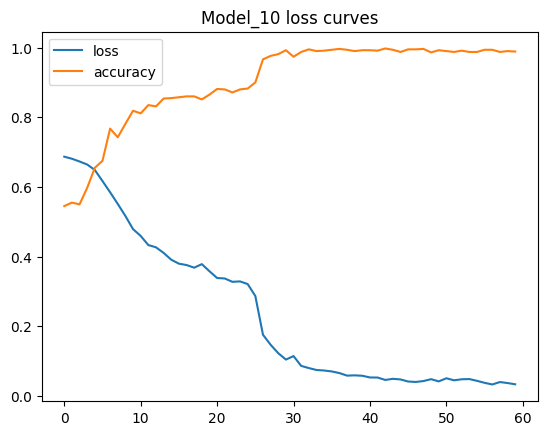

In [ ]:
pd.DataFrame(history_10.history).plot()
plt.title("Model_10 loss curves")

In [ ]:
tf.random.set_seed(42)

model_11 = tf.keras.Sequential([
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(1, activation="sigmoid")
])

model_11.compile(loss="binary_crossentropy",
                 optimizer=tf.keras.optimizers.Adam(learning_rate=0.02),
                 metrics=["accuracy"])

history_11 = model_11.fit(X_train, y_train, epochs=20)

Epoch 1/20
25/25 [==============================] - 1s 2ms/step - loss: 0.6851 - accuracy: 0.5412
Epoch 2/20
25/25 [==============================] - 0s 2ms/step - loss: 0.6746 - accuracy: 0.5800
Epoch 3/20
25/25 [==============================] - 0s 2ms/step - loss: 0.6603 - accuracy: 0.5825
Epoch 4/20
25/25 [==============================] - 0s 2ms/step - loss: 0.6446 - accuracy: 0.6400
Epoch 5/20
25/25 [==============================] - 0s 2ms/step - loss: 0.6289 - accuracy: 0.6450
Epoch 6/20
25/25 [==============================] - 0s 2ms/step - loss: 0.6021 - accuracy: 0.7025
Epoch 7/20
25/25 [==============================] - 0s 2ms/step - loss: 0.5831 - accuracy: 0.7262
Epoch 8/20
25/25 [==============================] - 0s 2ms/step - loss: 0.5613 - accuracy: 0.7375
Epoch 9/20
25/25 [==============================] - 0s 2ms/step - loss: 0.5310 - accuracy: 0.7912
Epoch 10/20
25/25 [==============================] - 0s 2ms/step - loss: 0.4974 - accuracy: 0.7962
Epoch 11/20
25/25 [

Text(0.5, 1.0, 'Model_11 loss curves')

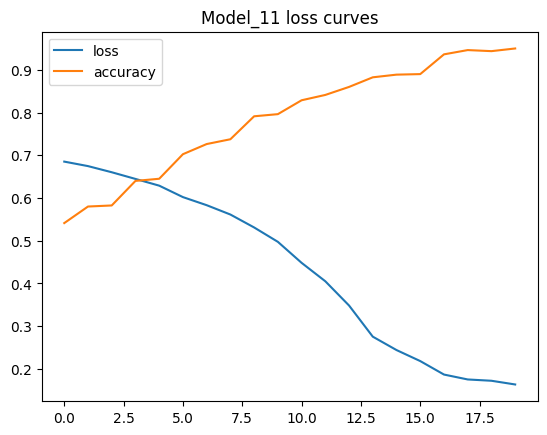

In [ ]:
pd.DataFrame(history_11.history).plot()
plt.title("Model_11 loss curves")

In [ ]:
model_11.evaluate(X_test, y_test)

7/7 [==============================] - 0s 3ms/step - loss: 0.1662 - accuracy: 0.9650


[0.16617658734321594, 0.9649999737739563]

313/313 [==============================] - 0s 1ms/step
binary classification
313/313 [==============================] - 0s 1ms/step
binary classification


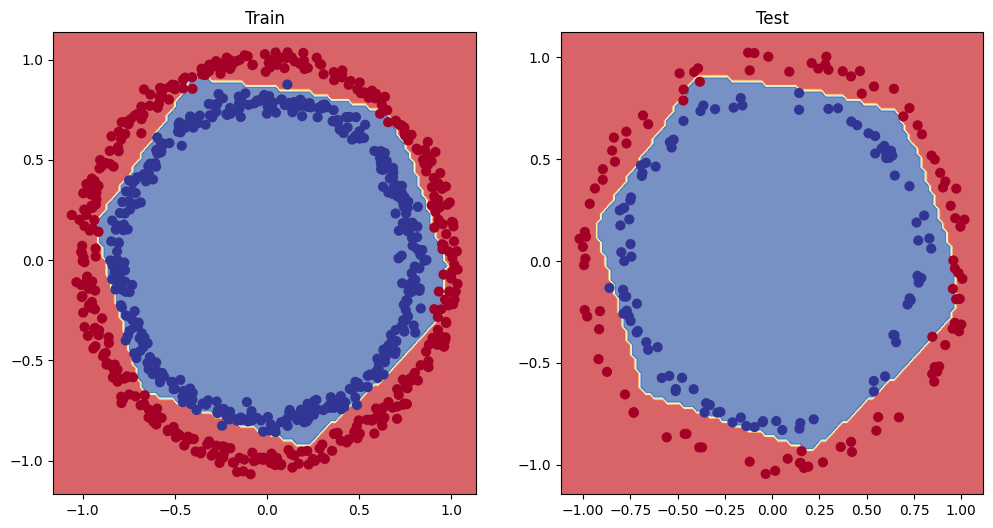

In [ ]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Train")
plot_decision_boundary(model_11, X=X_train, y=y_train)
plt.subplot(1, 2, 2)
plt.title("Test")
plot_decision_boundary(model_11, X=X_test, y=y_test)
plt.show();

In [ ]:
from sklearn.metrics import confusion_matrix

In [ ]:
y_preds_11 = model_11.predict(X_test)

confusion_matrix(y_test, tf.round(y_preds_11))

7/7 [==============================] - 0s 2ms/step


array([[95,  6],
       [ 1, 98]])

In [ ]:
import itertools

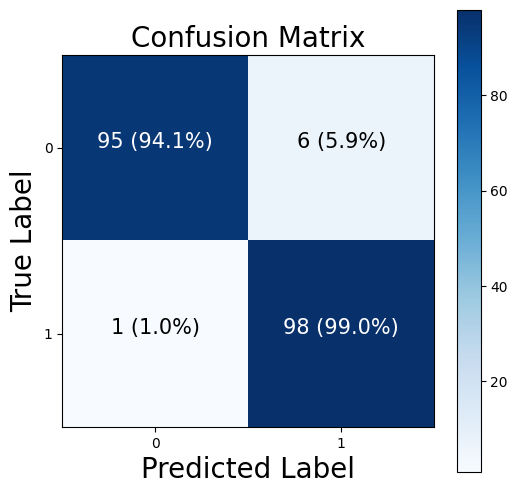

In [ ]:
figsize = (6, 6)

cm = confusion_matrix(y_test, tf.round(y_preds_11))

cm_norm = cm.astype("float") / cm.sum(axis=1)[:, np.newaxis]
n_classes = cm.shape[0]

fig, ax = plt.subplots(figsize=figsize)

cax = ax.matshow(cm, cmap=plt.cm.Blues)
fig.colorbar(cax)

classes = False

if classes :
  labels = classes
else:
  labels = np.arange(cm.shape[0])

ax.set(title="Confusion Matrix",
       xlabel="Predicted Label",
       ylabel="True Label",
       xticks=np.arange(n_classes),
       yticks=np.arange(n_classes),
       xticklabels=labels,
       yticklabels=labels)

ax.xaxis.set_label_position("bottom")
ax.xaxis.tick_bottom()

ax.xaxis.label.set_size(20)
ax.yaxis.label.set_size(20)
ax.title.set_size(20)

threshold = ((cm.max() + cm.min()) / 2)

for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
  plt.text(j, i, f"{cm[i, j]} ({cm_norm[i, j]*100:.1f}%)",
           horizontalalignment ="center",
           color="white" if cm[i, j] > threshold else "black",
           size=15)

In [155]:
import tensorflow as tf
from tensorflow.keras.datasets import fashion_mnist

In [157]:
(train_data, train_labels), (test_data, test_labels) = fashion_mnist.load_data()

4422102/4422102 [==============================] - 0s 0us/step


In [161]:
print(f"Training Sample:\n{train_data[0]}\n")
print(f"Training Label:\n{train_labels[0]}\n")

Training Sample:
[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   1   0   0  13  73   0
    0   1   4   0   0   0   0   1   1   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3   0  36 136 127  62
   54   0   0   0   1   3   4   0   0   3]
 [  0   0   0   0   0   0   0   0   0   0   0   0   6   0 102 204 176 134
  144 123  23   0   0   0   0  12  10   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0 155 236 207 178
  107 156 161 109  64  23  77 130  72  15]
 [  0   0   0   0   0   0   0   0   0   0   0   1   0  69 207 223 218 216
  216 163 127 121 122 146 141  88 172  66]
 [  0   0   0   0   0   0   0   0   0   1   1  

In [162]:
train_data[0].shape, train_labels[0].shape

((28, 28), ())

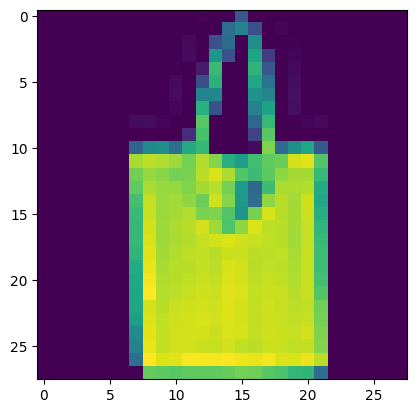

In [168]:
import matplotlib.pyplot as plt
plt.imshow(train_data[14131]);

In [170]:
train_labels[14131]

8

0 T-shirt/top

1 Trouser

2 Pullover

3 Dress

4 Coat

5 Sandal

6 Shirt

7 Sneaker

8 Bag

9 Ankle boot

In [177]:
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat", "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

Text(0.5, 1.0, 'Pullover')

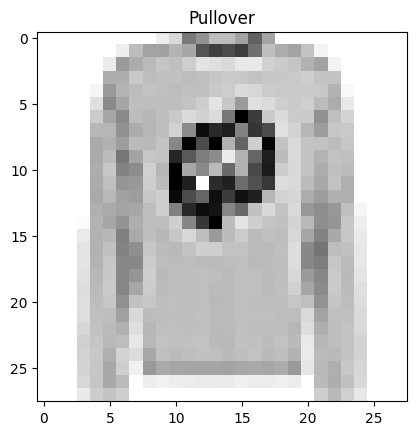

In [183]:
chosen_index = 123
plt.imshow(train_data[chosen_index], cmap=plt.cm.binary)
plt.title(class_names[train_labels[chosen_index]])

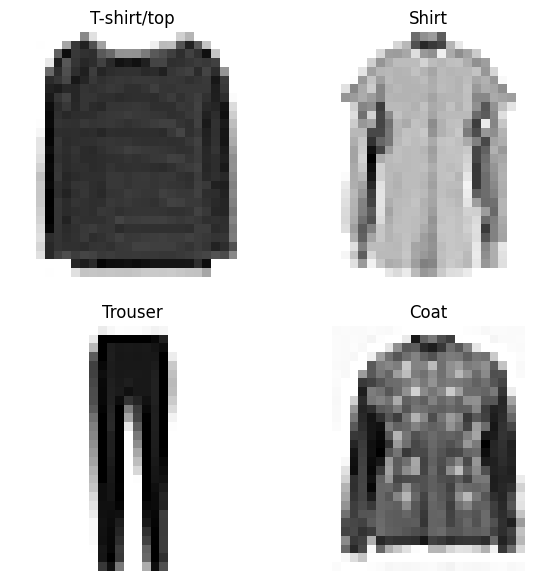

In [184]:
import random
plt.figure(figsize=(7, 7))

for i in range(4):
  ax = plt.subplot(2, 2, i+1)
  rand_index = random.choice(range(len(train_data)))
  plt.imshow(train_data[rand_index], cmap=plt.cm.binary)
  plt.title(class_names[train_labels[rand_index]])
  plt.axis(False)

In [187]:
# input shape
train_data[0].shape

(28, 28)

In [189]:
# output shape
len(class_names)

10

In [201]:
tf.random.set_seed(42)

fashion_model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(10, activation="softmax")
])

fashion_model.compile(loss=tf.keras.losses.CategoricalCrossentropy(),
                      optimizer=tf.keras.optimizers.Adam(),
                      metrics=["accuracy"])

non_norm_history = fashion_model.fit(train_data, tf.one_hot(train_labels, depth=10), epochs=10, validation_data=(test_data, tf.one_hot(test_labels, depth=10)))

Epoch 1/10
1875/1875 [==============================] - 6s 3ms/step - loss: 2.5350 - accuracy: 0.0993 - val_loss: 2.3021 - val_accuracy: 0.1003
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 2.3024 - accuracy: 0.0993 - val_loss: 2.3027 - val_accuracy: 0.1000
Epoch 3/10
1875/1875 [==============================] - 5s 3ms/step - loss: 2.3027 - accuracy: 0.1001 - val_loss: 2.3027 - val_accuracy: 0.1000
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 2.3027 - accuracy: 0.0975 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 2.3033 - accuracy: 0.0972 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch 6/10
1875/1875 [==============================] - 5s 3ms/step - loss: 2.3028 - accuracy: 0.0992 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch 7/10
1875/1875 [==============================] - 5s 2ms/step - loss: 2.3028 - accuracy: 0.0987 - val_loss: 2.3026 - val_accuracy:

In [196]:
fashion_model.summary()

Model: "sequential_33"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_2 (Flatten)         (None, 784)               0         
                                                                 
 dense_91 (Dense)            (None, 4)                 3140      
                                                                 
 dense_92 (Dense)            (None, 4)                 20        
                                                                 
 dense_93 (Dense)            (None, 10)                50        
                                                                 
Total params: 3210 (12.54 KB)
Trainable params: 3210 (12.54 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [198]:
train_data_norm = train_data / 255.0
test_data_norm = test_data / 255.0

In [202]:
tf.random.set_seed(42)

fashion_model_2 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(10, activation="softmax")
])

fashion_model_2.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                      optimizer=tf.keras.optimizers.Adam(),
                      metrics=["accuracy"])

norm_history = fashion_model_2.fit(train_data_norm, train_labels, epochs=10, validation_data=(test_data_norm, test_labels))

Epoch 1/10
1875/1875 [==============================] - 5s 2ms/step - loss: 1.0841 - accuracy: 0.5749 - val_loss: 0.7806 - val_accuracy: 0.7104
Epoch 2/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.7198 - accuracy: 0.7330 - val_loss: 0.7165 - val_accuracy: 0.7380
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.6691 - accuracy: 0.7569 - val_loss: 0.6779 - val_accuracy: 0.7601
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.6409 - accuracy: 0.7650 - val_loss: 0.6699 - val_accuracy: 0.7607
Epoch 5/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.6248 - accuracy: 0.7711 - val_loss: 0.6454 - val_accuracy: 0.7644
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.6113 - accuracy: 0.7749 - val_loss: 0.6402 - val_accuracy: 0.7694
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5947 - accuracy: 0.7819 - val_loss: 0.6285 - val_accuracy:

<Axes: title={'center': 'Normalized data'}>

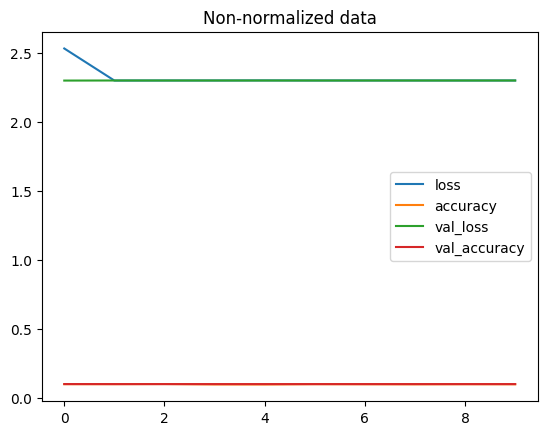

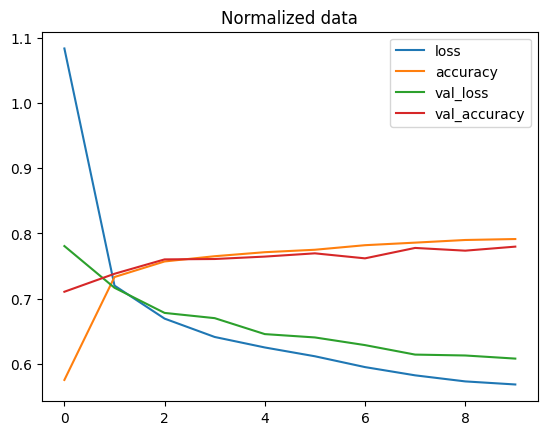

In [203]:
import pandas as pd

pd.DataFrame(non_norm_history.history).plot(title="Non-normalized data")
pd.DataFrame(norm_history.history).plot(title="Normalized data")

In [204]:
tf.random.set_seed(42)

fashion_model_3 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(10, activation="softmax")
])

fashion_model_3.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                      optimizer=tf.keras.optimizers.Adam(),
                      metrics=["accuracy"])

lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-3 * 10 ** (epoch/20))

find_lr_history = fashion_model_3.fit(train_data_norm,
                                      train_labels,
                                      epochs=40,
                                      validation_data=(test_data_norm, test_labels),
                                      callbacks=[lr_scheduler])

Epoch 1/40
1875/1875 [==============================] - 7s 3ms/step - loss: 1.4135 - accuracy: 0.4806 - val_loss: 1.0876 - val_accuracy: 0.6477 - lr: 0.0010
Epoch 2/40
1875/1875 [==============================] - 5s 3ms/step - loss: 0.9782 - accuracy: 0.6678 - val_loss: 0.9233 - val_accuracy: 0.6859 - lr: 0.0011
Epoch 3/40
1875/1875 [==============================] - 4s 2ms/step - loss: 0.8558 - accuracy: 0.7085 - val_loss: 0.8405 - val_accuracy: 0.7109 - lr: 0.0013
Epoch 4/40
1875/1875 [==============================] - 5s 3ms/step - loss: 0.8036 - accuracy: 0.7233 - val_loss: 0.8000 - val_accuracy: 0.7172 - lr: 0.0014
Epoch 5/40
1875/1875 [==============================] - 5s 2ms/step - loss: 0.7768 - accuracy: 0.7264 - val_loss: 0.7808 - val_accuracy: 0.7313 - lr: 0.0016
Epoch 6/40
1875/1875 [==============================] - 4s 2ms/step - loss: 0.7571 - accuracy: 0.7333 - val_loss: 0.8031 - val_accuracy: 0.7073 - lr: 0.0018
Epoch 7/40
1875/1875 [==============================] - 6s

Text(0.5, 1.0, 'Finding the ideal learning rate')

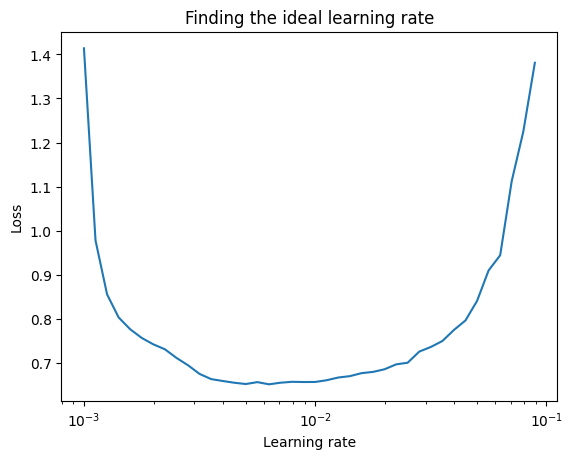

In [205]:
import numpy as np
import matplotlib.pyplot as plt

lrs = 1e-3 * 10 ** (tf.range(40)/20)
plt.semilogx(lrs, find_lr_history.history["loss"])
plt.xlabel("Learning rate")
plt.ylabel("Loss")
plt.title("Finding the ideal learning rate")

In [207]:
# between 0.001 and 0.01
# let's try 0.005

tf.random.set_seed(42)

fashion_model_4 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(10, activation="softmax")
])

fashion_model_4.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                      optimizer=tf.keras.optimizers.Adam(learning_rate=0.005),
                      metrics=["accuracy"])

history_4 = fashion_model_4.fit(train_data_norm,
                                      train_labels,
                                      epochs=20,
                                      validation_data=(test_data_norm, test_labels))

Epoch 1/20
1875/1875 [==============================] - 6s 3ms/step - loss: 1.2193 - accuracy: 0.5479 - val_loss: 0.9271 - val_accuracy: 0.6472
Epoch 2/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.8736 - accuracy: 0.6734 - val_loss: 0.9008 - val_accuracy: 0.6768
Epoch 3/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.8300 - accuracy: 0.6914 - val_loss: 0.8768 - val_accuracy: 0.6865
Epoch 4/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.8053 - accuracy: 0.7034 - val_loss: 0.8417 - val_accuracy: 0.6811
Epoch 5/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.7959 - accuracy: 0.7092 - val_loss: 0.8344 - val_accuracy: 0.7013
Epoch 6/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.7828 - accuracy: 0.7165 - val_loss: 0.8133 - val_accuracy: 0.7140
Epoch 7/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.7774 - accuracy: 0.7192 - val_loss: 0.8077 - val_accuracy:

In [208]:
# let's try 0.001

tf.random.set_seed(42)

fashion_model_5 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(10, activation="softmax")
])

fashion_model_5.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                      optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
                      metrics=["accuracy"])

history_5 = fashion_model_5.fit(train_data_norm,
                                      train_labels,
                                      epochs=20,
                                      validation_data=(test_data_norm, test_labels))

Epoch 1/20
1875/1875 [==============================] - 6s 3ms/step - loss: 1.4367 - accuracy: 0.4429 - val_loss: 1.1185 - val_accuracy: 0.5993
Epoch 2/20
1875/1875 [==============================] - 4s 2ms/step - loss: 1.0186 - accuracy: 0.6329 - val_loss: 0.9681 - val_accuracy: 0.6583
Epoch 3/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.9138 - accuracy: 0.6778 - val_loss: 0.8840 - val_accuracy: 0.6922
Epoch 4/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.8375 - accuracy: 0.7007 - val_loss: 0.8288 - val_accuracy: 0.6994
Epoch 5/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.7955 - accuracy: 0.7067 - val_loss: 0.7966 - val_accuracy: 0.7095
Epoch 6/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.7715 - accuracy: 0.7072 - val_loss: 0.8013 - val_accuracy: 0.6984
Epoch 7/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.7554 - accuracy: 0.7053 - val_loss: 0.7717 - val_accuracy:

In [209]:
import itertools
from sklearn.metrics import confusion_matrix

def make_confusion_matrix(y_true, y_pred, classes=None, figsize=(10, 10), text_size=15):
  cm = confusion_matrix(y_true, y_pred)

  cm_norm = cm.astype("float") / cm.sum(axis=1)[:, np.newaxis]
  n_classes = cm.shape[0]

  fig, ax = plt.subplots(figsize=figsize)

  cax = ax.matshow(cm, cmap=plt.cm.Blues)
  fig.colorbar(cax)

  if classes :
    labels = classes
  else:
    labels = np.arange(cm.shape[0])

  ax.set(title="Confusion Matrix",
        xlabel="Predicted Label",
        ylabel="True Label",
        xticks=np.arange(n_classes),
        yticks=np.arange(n_classes),
        xticklabels=labels,
        yticklabels=labels)

  ax.xaxis.set_label_position("bottom")
  ax.xaxis.tick_bottom()

  ax.xaxis.label.set_size(text_size)
  ax.yaxis.label.set_size(text_size)
  ax.title.set_size(text_size)

  threshold = ((cm.max() + cm.min()) / 2)

  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, f"{cm[i, j]} ({cm_norm[i, j]*100:.1f}%)",
            horizontalalignment ="center",
            color="white" if cm[i, j] > threshold else "black",
            size=text_size)

In [211]:
test_labels

array([9, 2, 1, ..., 8, 1, 5], dtype=uint8)

In [213]:
y_probs = fashion_model_5.predict(test_data_norm)

y_probs[:5]

313/313 [==============================] - 1s 4ms/step


array([[2.72395395e-09, 7.54507781e-19, 2.24384804e-14, 3.31569328e-10,
        2.06550355e-09, 4.18238044e-01, 1.03007434e-08, 8.25889260e-02,
        1.01102563e-03, 4.98161882e-01],
       [7.52914348e-05, 2.52362384e-20, 9.28101361e-01, 1.93345739e-09,
        9.86236893e-03, 1.40008720e-21, 6.18806519e-02, 0.00000000e+00,
        8.03397779e-05, 0.00000000e+00],
       [9.67695785e-04, 9.38925803e-01, 1.19000295e-04, 5.62277138e-02,
        1.85662095e-04, 2.75020162e-03, 6.22345775e-04, 1.54362919e-04,
        4.58133800e-05, 1.32474281e-06],
       [7.80230446e-04, 9.47585106e-01, 9.81247722e-05, 4.79928888e-02,
        1.59783114e-04, 2.64803786e-03, 5.10122569e-04, 1.86759411e-04,
        3.75587733e-05, 1.36423216e-06],
       [7.45956525e-02, 4.95895620e-06, 4.40530121e-01, 1.73875745e-02,
        5.24176694e-02, 1.87644513e-08, 4.09961879e-01, 5.04111427e-17,
        5.10219857e-03, 8.77722237e-21]], dtype=float32)

In [216]:
y_probs[0], class_names[tf.argmax(y_probs[0])]

(array([2.7239540e-09, 7.5450778e-19, 2.2438480e-14, 3.3156933e-10,
        2.0655035e-09, 4.1823804e-01, 1.0300743e-08, 8.2588926e-02,
        1.0110256e-03, 4.9816188e-01], dtype=float32),
 'Ankle boot')

In [224]:
y_preds = y_probs.argmax(axis=1)

for i in range (10):
  print(class_names[y_preds[i]])

Ankle boot
Pullover
Trouser
Trouser
Pullover
Trouser
Coat
Coat
Sandal
Sneaker


Text(0.5, 1.0, 'Sandal')

Exception ignored in: <function _xla_gc_callback at 0x7dfb41075d80>
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/jax/_src/lib/__init__.py", line 97, in _xla_gc_callback
    def _xla_gc_callback(*args):
KeyboardInterrupt: 


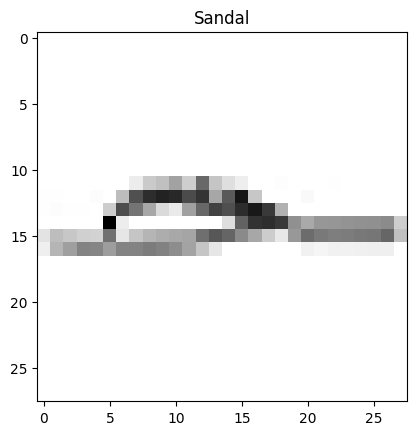

In [228]:
chosen_index = 8
plt.imshow(test_data[chosen_index], cmap=plt.cm.binary)
plt.title(class_names[test_labels[chosen_index]])

In [229]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_true=test_labels,
                 y_pred=y_preds)

array([[692,   5,  22, 150,   5,   3, 105,   0,  18,   0],
       [  0, 928,   2,  49,   7,   0,  12,   0,   2,   0],
       [ 18,   0, 554,  15, 224,   2, 183,   0,   4,   0],
       [ 30,  24,   8, 800,  28,   6,  97,   0,   7,   0],
       [  0,   0,  59,  26, 833,   1,  74,   0,   7,   0],
       [  0,   0,   0,   1,   0, 875,   1,  49,  15,  59],
       [122,   4, 130,  81, 371,   2, 267,   0,  23,   0],
       [  0,   0,   0,   0,   0,  60,   0, 887,   0,  53],
       [  2,   1,   7,   8,   7,  27,  20,   3, 924,   1],
       [  0,   0,   0,   0,   0,  36,   0,  41,   5, 918]])

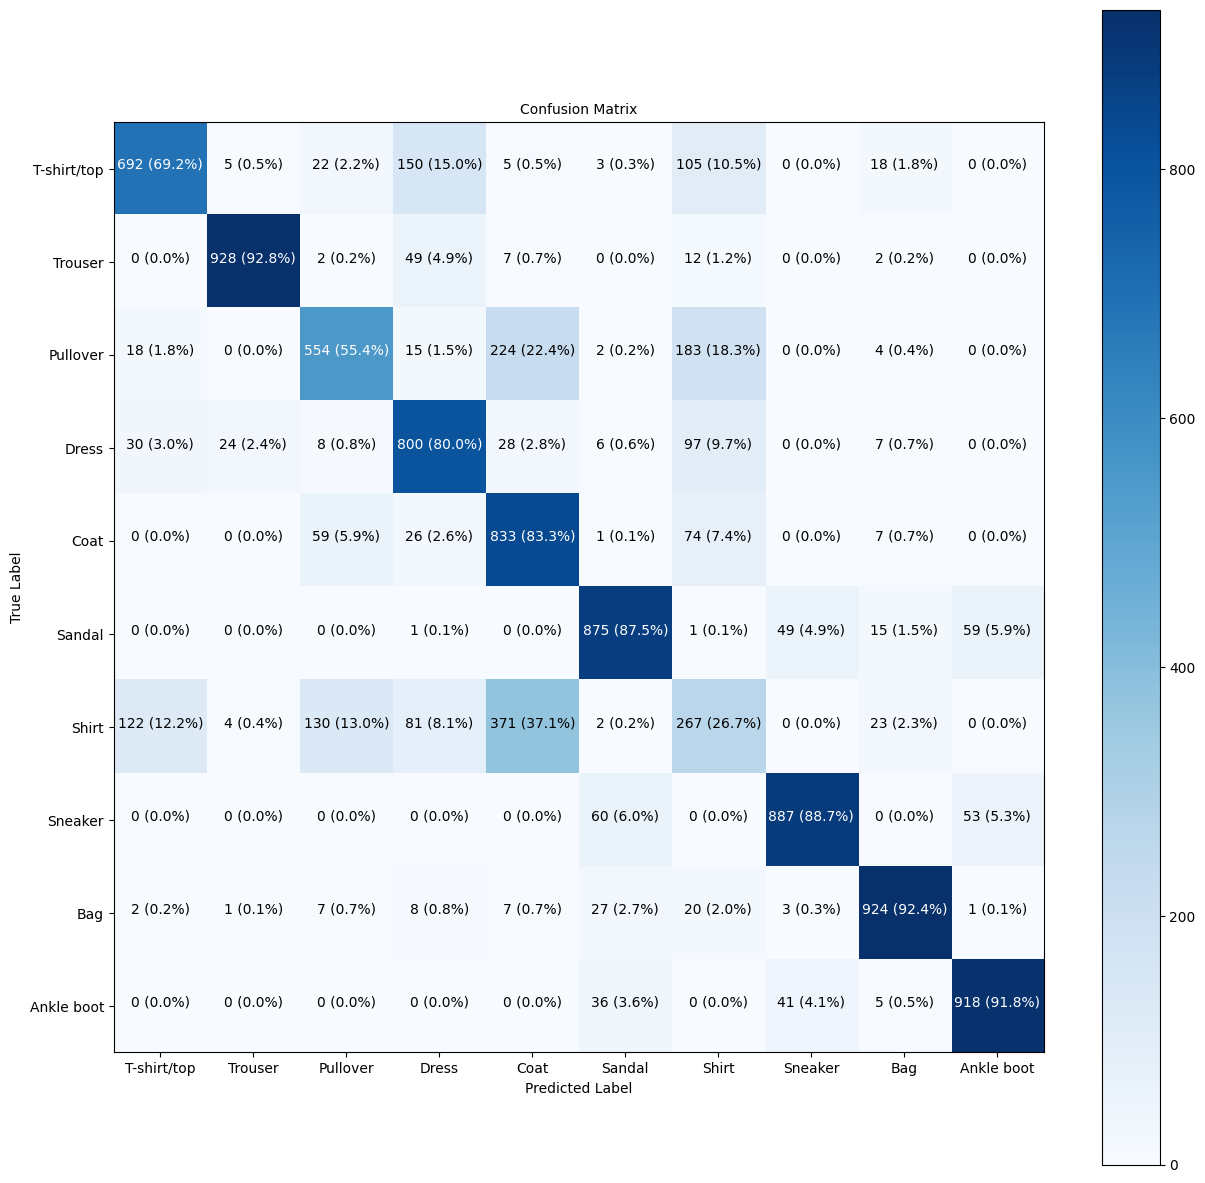

In [230]:
make_confusion_matrix(y_true=test_labels,
                      y_pred=y_preds,
                      classes=class_names,
                      figsize=(15,15),
                      text_size=10)